In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import yfinance as yf

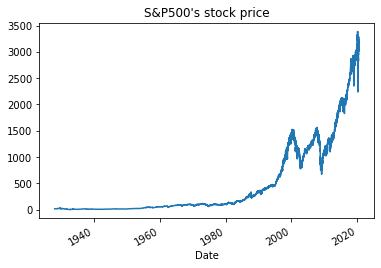

In [45]:
# data for S&P500
ticker = yf.Ticker('^GSPC')

SP500_df = ticker.history(period="max", interval='1d')

SP500_df['Close'].plot(title="S&P500's stock price")

In [47]:
SP500_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,0,0,0
1928-01-03,17.76,17.76,17.76,17.76,0,0,0
1928-01-04,17.72,17.72,17.72,17.72,0,0,0
1928-01-05,17.55,17.55,17.55,17.55,0,0,0
1928-01-06,17.66,17.66,17.66,17.66,0,0,0
1928-01-09,17.50,17.50,17.50,17.50,0,0,0
1928-01-10,17.37,17.37,17.37,17.37,0,0,0
1928-01-11,17.35,17.35,17.35,17.35,0,0,0
1928-01-12,17.47,17.47,17.47,17.47,0,0,0


In [8]:
SP500_df.shape

(23249, 7)

In [9]:
SP500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23249 entries, 1927-12-30 to 2020-07-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23249 non-null  float64
 1   High          23249 non-null  float64
 2   Low           23249 non-null  float64
 3   Close         23249 non-null  float64
 4   Volume        23249 non-null  int64  
 5   Dividends     23249 non-null  int64  
 6   Stock Splits  23249 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [10]:
SP500_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,23249.000000,23249.000000,23249.000000,23249.000000,2.324900e+04,23249.0,23249.0
mean,477.619867,480.428561,474.626967,477.718128,7.581319e+08,0.0,0.0
std,708.742589,712.532510,704.595465,708.842507,1.474134e+09,0.0,0.0
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,23.790000,23.790000,23.790000,23.790000,1.260000e+06,0.0,0.0
50%,99.320000,100.080000,98.520000,99.320000,1.705000e+07,0.0,0.0
75%,806.810000,814.900000,800.200000,807.480000,5.138300e+08,0.0,0.0
max,3380.450000,3393.520000,3378.830000,3386.150000,1.145623e+10,0.0,0.0


In [12]:
SP500_df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
SP500_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999971,0.999958,0.999930,0.819189
High,0.999971,1.000000,0.999941,0.999963,0.820160
Low,0.999958,0.999941,1.000000,0.999965,0.817830
Close,0.999930,0.999963,0.999965,1.000000,0.818980
Volume,0.819189,0.820160,0.817830,0.818980,1.000000


In [35]:
# train-test splitting
train_data = SP500_df['Open'].values[:20000]
test_data = SP500_df['Open'].values[20000:]

In [16]:
# data preprocessing
train = train_data.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)

# prepare training dataset for 60 timesteps
x_train = []
y_train = []

for i in range(train.shape[0]-60):
    x_train.append(train[i:i+60, 0])
    y_train.append(train[i+60, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

In [17]:
x_train.shape

(23189, 60, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import metrics

In [19]:
model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=70, return_sequences=False))
model.add(Dropout(rate=0.1))

model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=[metrics.mae])

In [21]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Train on 23189 samples
Epoch 1/10
23189/23189 [==============================] - 88s 4ms/sample - loss: 2.9170e-04 - mean_absolute_error: 0.0113
Epoch 2/10
23189/23189 [==============================] - 95s 4ms/sample - loss: 2.8691e-04 - mean_absolute_error: 0.0111
Epoch 3/10
23189/23189 [==============================] - 101s 4ms/sample - loss: 2.7151e-04 - mean_absolute_error: 0.0110
Epoch 4/10
23189/23189 [==============================] - 102s 4ms/sample - loss: 2.6918e-04 - mean_absolute_error: 0.0104
Epoch 5/10
23189/23189 [==============================] - 89s 4ms/sample - loss: 2.6851e-04 - mean_absolute_error: 0.0106
Epoch 6/10
23189/23189 [==============================] - 102s 4ms/sample - loss: 2.5805e-04 - mean_absolute_error: 0.0102
Epoch 7/10
23189/23189 [==============================] - 107s 5ms/sample - loss: 2.5494e-04 - mean_absolute_error: 0.0103
Epoch 8/10
23189/23189 [==============================] - 103s 4ms/sample - loss: 2.4817e-04 - mean_absolute_error: 0.0

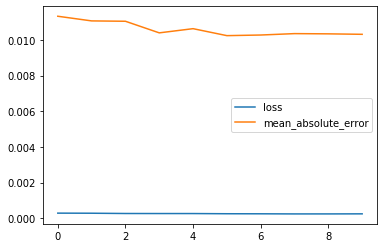

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(l=4, n=50, r=0.1, opt='rmsprop'):
    model = Sequential()
    for j in range(l):
        model.add(LSTM(units=n, return_sequences=True))
        model.add(Dropout(rate=r))
    model.add(Dense(units=1))
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=[metrics.mae])
    return model
    
model = KerasRegressor(build_fn=create_model, epochs=6, batch_size=32)

from sklearn.model_selection import RandomizedSearchCV

parameters = dict(n=[40, 50, 60, 70, 80],
                  r=[0.1, 0.3, 0.5],
                  l=[3, 4, 5, 6],
                  batch_size=[32, 64, 128],
                  opt=['sgd', 'rmsprop', 'adam'])

tuner = RandomizedSearchCV(model, param_distributions=parameters, cv=3, n_iter=10, n_jobs=-1, verbose=1)

tuned_results = tuner.fit(x_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (tuned_results.best_score_, tuned_results.best_params_))

means = tuned_results.cv_results_['mean_test_score']
stds = tuned_results.cv_results_['std_test_score']
params = tuned_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [25]:
total_data = SP500_df['Open'].values.reshape(-1, 1)

total_data = scaler.transform(total_data)

x_test = []
for i in range(len(test_data)):
    x_test.append(total_data[i-len(test_data)-60:i-len(test_data), 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))

In [31]:
y_test = test_data.reshape(-1, 1)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

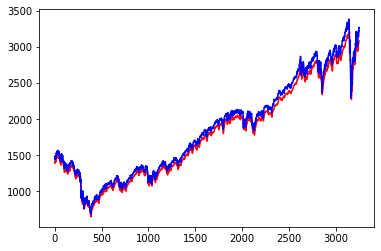

In [41]:
plt.plot(predictions, color='red')
plt.plot(y_test, color='blue')
plt.show()

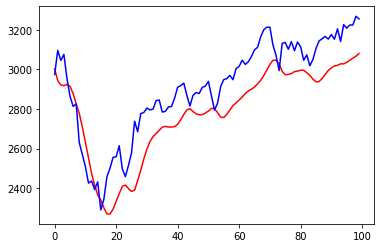

In [42]:
plt.plot(predictions[-100:], color='red')
plt.plot(y_test[-100:], color='blue')
plt.show()

In [33]:
model.evaluate(x_test, y_test)

3249/3249 [==============================] - 4s 1ms/sample - loss: 3892790.3306 - mean_absolute_error: 1857.9381


[3892790.3305632505, 1857.9381]

In [34]:
from sklearn.metrics import mean_squared_error
RMSE = round(np.sqrt(mean_squared_error(y_test, predictions)), 2)
print(RMSE)

83.54
